In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D,MaxPooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.utils import plot_model,model_to_dot
from tensorflow.keras.initializers import he_normal,glorot_normal
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files
from livelossplot import PlotLossesKerasTF
from matplotlib import pyplot as plt
from IPython.display import clear_output,SVG

from PIL import Image

import graphviz
import pydotplus

import time
from datetime import datetime as dt

import copy
import numpy as np
import os

import pandas as pd
import csv_acc_loss_plotter
import swifter

from dask.multiprocessing import get
from pandarallel import pandarallel
from tqdm import tqdm#progress bar

import winsound
np.set_printoptions(threshold=np.inf)

tqdm.pandas()#progress bar

In [2]:
def apply_loop(frompd,arg1):
    arg1.append(np.asarray(Image.open(frompd).convert('RGB')))

def load_dataset(path):
    data=load_files(path)
    targets_img = []

    data_df = pd.DataFrame(columns=['filenames', 'target_names'])
    data_df['filenames'] = data['filenames']
    data_df['target'] = data['target']
    data_df['img'] = data_df['filenames'].progress_apply(apply_loop,arg1=targets_img)

    # 返り値にそれぞれ　画像のリスト、エンコーディングされた整数値、カテゴリーリスト
    return targets_img, data_df['target'] ,data["target_names"]



In [3]:
    
# CPU <-> GPU切り替え
# with tf.device("/device:CPU:0"):
with tf.device("/device:GPU:0"):
    # data load---------------
    traindata = np.load('fruits_train.npz')
    testdata = np.load('fruits_train.npz')
    x_test, y_test,target_labels_test = traindata['data'],traindata['target_labels'],traindata['labels_list']
    x_train, y_train,target_labels_train = testdata['data'],testdata['target_labels'],testdata['labels_list']

    x_test_raw = copy.deepcopy(x_test)

100%|██████████| 60498/60498 [00:26<00:00, 2268.14it/s]


y_train len = 60498


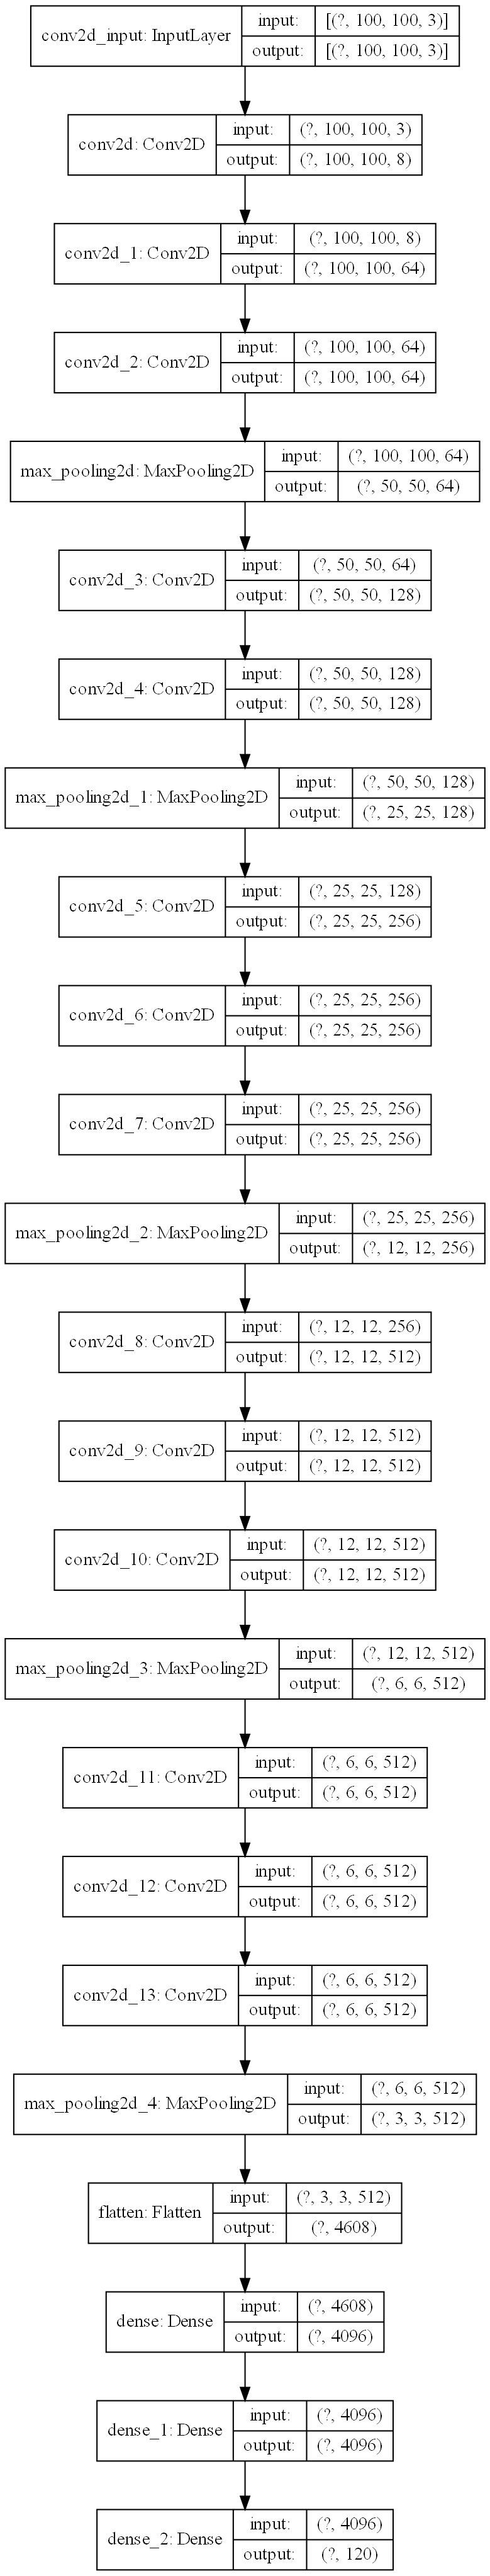

In [5]:

   # モデル作成--------------------------------
    model = tf.keras.Sequential() #層を積み重ねるモデル
    # 以下vgg16

    """
    model.add(Conv2D(8, kernel_size=(3, 3), padding='same',kernel_initializer=he_normal(), input_shape=(100, 100, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2),strides=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2),strides=(2, 2)))
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2),strides=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2),strides=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D((2, 2),strides=(2, 2)))

    model.add(tf.keras.layers.Flatten()) #4D -> 1D
    model.add(Dense(4096, kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(4096, kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(120, activation='softmax'))
    """
    model.add(Conv2D(8, kernel_size=(3, 3), padding='same',kernel_initializer=he_normal(),activation='relu', input_shape=(100, 100, 3)))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', kernel_initializer=he_normal(),activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', kernel_initializer=he_normal(),activation='relu'))


    model.add(MaxPooling2D((2, 2),strides=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_initializer=he_normal(),activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_initializer=he_normal(),activation='relu'))

    model.add(MaxPooling2D((2, 2),strides=(2, 2)))
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))

    model.add(MaxPooling2D((2, 2),strides=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))

    model.add(MaxPooling2D((2, 2),strides=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same',  kernel_initializer=he_normal(),activation='relu'))

    model.add(MaxPooling2D((2, 2),strides=(2, 2)))

    model.add(tf.keras.layers.Flatten()) #4D -> 1D
    model.add(Dense(4096, kernel_initializer=he_normal(),activation='relu'))
    model.add(Dense(4096, kernel_initializer=he_normal(),activation='relu'))
    model.add(Dense(120, activation='softmax'))
    plot_model(model, to_file='model.png',show_shapes=True, expand_nested=True,dpi=150)
    

In [6]:
    # 時間計測
    start_time = time.perf_counter()# 計測開始

    model.compile(
        loss=keras.losses.categorical_crossentropy, #一般的にはこれが用いられるらしい(鈴木さん曰く)
        optimizer=keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    batch_size = 8
    epochs = 4
     # 画像で保存
    dirstr = "./miss_img/batch_size{0}_epochs{1}_{2}".format(batch_size,epochs,dt.now().strftime("%Y_%m_%d_%H_%M_%S"))
    os.makedirs(dirstr)
    # """
    csvlog = CSVLogger('{}/log.csv'.format(dirstr), separator=',', append=True)
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_split=0.1,callbacks=[PlotLossesKerasTF(),csvlog])

    score = model.evaluate(x_test, y_test, verbose=0)
    predictdata = model.predict(x_test)

    # 答え出力&時間計測
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print("calc time = {}[s]".format(time.perf_counter() - start_time))
    with open('{}/test_result.log'.format(dirstr), mode='w') as f:
        f.write('Test loss: {}\n'.format(score[0]))
        f.write('Test accuracy: {}\n'.format(score[1]))
        f.write("calc time = {}[s]\n".format(time.perf_counter() - start_time))

    # 不正解画像番号抽出
    miss_data_nums = []
    for cnt,predata in enumerate(predictdata):
        if np.where(predata == predata.max()) != np.where(y_test[cnt] == y_test[cnt].max()):
            miss_data_nums.append([cnt,np.where(y_test[cnt] == y_test[cnt].max()),np.where(predata == predata.max())])

   
    for num in miss_data_nums:
        # print(x_test_raw[num])
        Image.fromarray(x_test_raw[num[0]]).save("{0}/missimg{1}_ans_{2}_predict{3}.png".format(dirstr,num[0],str(num[1])[8:9],str(num[2])[8:9]))
    


# 学習曲線の保存
csv_acc_loss_plotter.plot(pddata=pd.read_csv('{}/log.csv'.format(dirstr)),acc_lim=1.0,acc_min=0.7,fontsize=20,output_path='{}/log.png'.format(dirstr))


# 終了音
winsound.PlaySound("SystemExit", winsound.SND_ALIAS)
winsound.PlaySound("SystemHand", winsound.SND_ALIAS)
winsound.PlaySound("SystemExit", winsound.SND_ALIAS)

# save model & weight
filename = "vgg16"
model.save_weights(os.path.join(filename+'_weights.hdf5'))
json_string = model.to_json()
open(os.path.join(filename+'_model.json'), 'w').write(json_string)



ValueError: A target array with shape (60498, 60498) was passed for an output of shape (None, 120) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.